## Problem Statement
#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description :

#### Undergrad : person is under graduated or not
#### Marital.Status : marital status of a person
#### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#### Work Experience : Work experience of an individual person
#### Urban : Whether that person belongs to urban area or not

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'imblearn'

In [2]:
Fraud = pd.read_csv(r'C:\DS Assignments\Assignment 14(Decision Trees)\Fraud_check.csv')
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
Fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


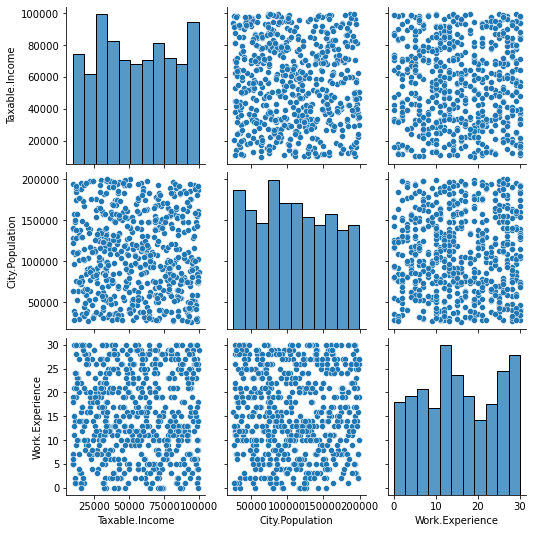

In [6]:
sns.pairplot(Fraud)

In [7]:
Fraud['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [8]:
Fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [9]:
Fraud['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [10]:
fr = Fraud.copy()

## Independent Variable

In [11]:
frx = fr[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]

In [12]:
frx

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [13]:
frx_encoded = pd.get_dummies(frx, columns = ['Undergrad', 'Marital.Status', 'Urban'])
frx_encoded

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


## Dependent Variable

In [14]:
fr.loc[fr["Taxable.Income"] <= 30000,"TaxIn"]="Risky"
fr.loc[fr["Taxable.Income"] >= 30000,"TaxIn"]="Good"
fr.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxIn
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [15]:
fr['TaxIn'].value_counts()

Good     476
Risky    124
Name: TaxIn, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
fry = lb.fit_transform(fr.TaxIn)

In [17]:
fry.shape

(600,)

In [18]:
fry

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Building Preliminary Classification Tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(frx_encoded, fry, test_size = 0.3, random_state=40)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((420, 9), (420,), (180, 9), (180,))

In [21]:
clfdf = DecisionTreeClassifier(random_state = 40)

In [22]:
clfdf = clfdf.fit(X_train, y_train)

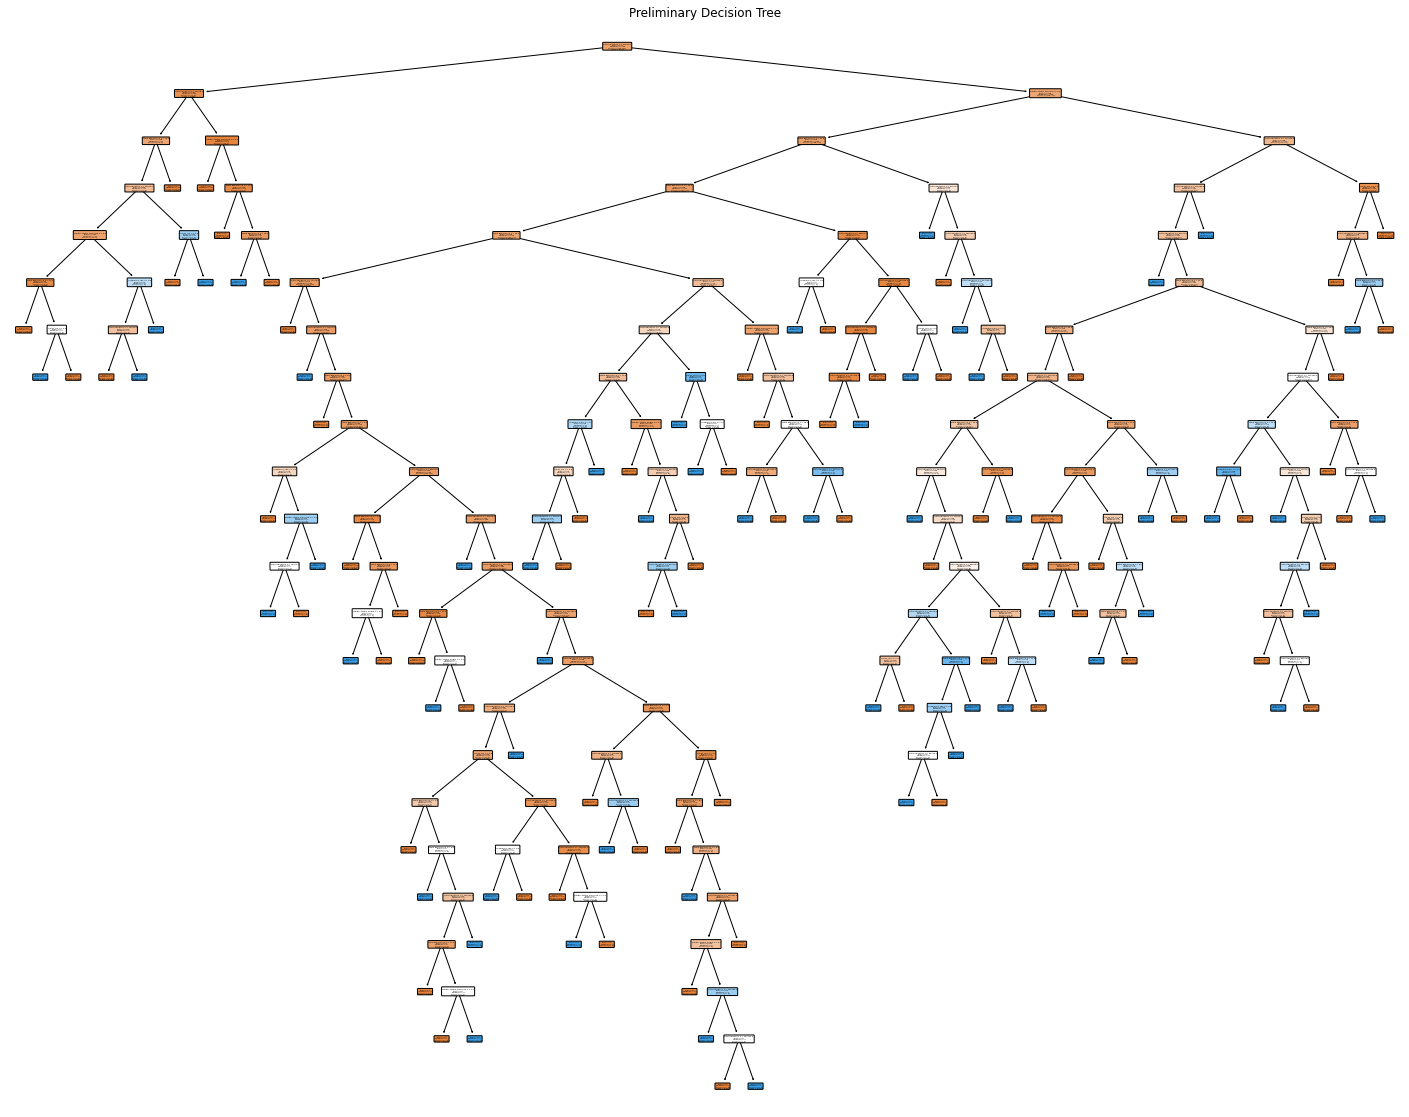

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
tree.plot_tree(clfdf,
               filled = True,
               rounded = True,
               class_names = ['Risky','Good'],
               feature_names = frx_encoded.columns)
plt.title('Preliminary Decision Tree')
plt.show()

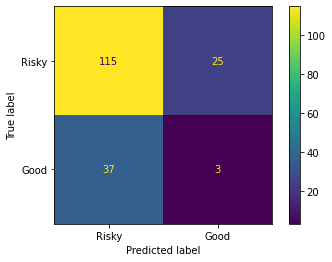

In [24]:
plot_confusion_matrix(clfdf, X_test, y_test, display_labels = ['Risky','Good'])

In [25]:
clfdf.score(X_test, y_test)

0.6555555555555556

## Balancing Data : SMOTE

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

## Prunning Decision Tree
#### Cost Complexitiy Prunning Part 1 : Visualizing alpha

In [ ]:
path = clfdf.cost_complexity_pruning_path(X_train_smote, y_train_smote)

In [ ]:
ccp_alphas = path.ccp_alphas

In [ ]:
clfdfs = []
for ccp_alpha in ccp_alphas:
clfdf = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)
clfdf.fit(X_train_smote, y_train_smote)
clfdfs.append(clfdf)

In [ ]:
# Now get the accuracy of tree using training and testing datasets as function of alphA

In [ ]:
train_score = [clfdf.score(X_train_smote, y_train_smote) for clfdf in clfdfs]

In [ ]:
test_score = [clfdf.score(X_test, y_test) for clfdf in clfdfs]

In [ ]:
fig, ax = plt.subplots()
#ax.set_xlable('alpha')
#ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, train_score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

### Part 2: Cross Validation for finding best Alpha value

In [ ]:
clfdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = 0.012)

In [ ]:
scores = cross_val_score(clfdt, X_train_smote, y_train_smote, cv = 5)

In [ ]:
df = pd.DataFrame( data = {'tree' : range(5), 'accuracy' : scores })

In [ ]:
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [ ]:
alpha_loop_val = []
 for ccp_alpha in ccp_alphas:
 cftdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)
 scores = cross_val_score(cftdt, X_train_smote, y_train_smote, cv=10)
 alpha_loop_val.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [ ]:
alpha_result = pd.DataFrame(alpha_loop_val,
            columns = ['alpha', 'mean_accuracy', 'std'] )

In [ ]:
alpha_result.plot( x = 'alpha',
                   y = 'mean_accuracy',
                   yerr = 'std',
                   marker = 'o',
                   linestyle = '--')

In [ ]:
# Finding the closest value which will give better accuracy
alpha_result[(alpha_result['alpha'] > 0.003) & alpha_result['alpha'] < 0.004]

In [ ]:
ideal_alpha = alpha_result[(alpha_result['alpha'] > 0.003) & alpha_result['alpha'] < 0.004]['alpha']

In [ ]:
ideal_alpha = np.mean(ideal_alpha)

In [ ]:
ideal_alpha

## Final Decision Tree

In [ ]:
clf_final = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 6, random_state = 40,
                                    ccp_alpha = ideal_alpha, criterion = 'gini')

In [ ]:
clf_final.fit(X_train_smote, y_train_smote)

In [ ]:
plot_confusion_matrix(clf_final, X_test, y_test, display_labels = ['Risky','Good'])

In [ ]:
clf_final.score(X_test, y_test)

In [ ]:
from sklearn.tree import plot_tree
    plt.figure(figsize=(25,20))
    tree.plot_tree(clf_final,
    filled = True,
    rounded = True,
    class_names = ['Risky','Good'],
    feature_names = frx_encoded.columns)
    plt.title('Preliminary Decision Tree')
    plt.show()